### Importing the Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

In [2]:
glaxo = pd.read_csv("D:/Chools/Day_03/GLAXO.csv")
beml = pd.read_csv("D:/Chools/Day_03/Beml.csv")

In [3]:
glaxo.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2010-01-04,1613.00,1629.10,1602.00,1629.0,1625.65,9365.0,151.74
1,2010-01-05,1639.95,1639.95,1611.05,1620.0,1616.80,38148.0,622.58
2,2010-01-06,1618.00,1644.00,1617.00,1639.0,1638.50,36519.0,595.09
3,2010-01-07,1645.00,1654.00,1636.00,1648.0,1648.70,12809.0,211.00
4,2010-01-08,1650.00,1650.00,1626.55,1640.0,1639.80,28035.0,459.11


In [4]:
glaxo.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

In [5]:
beml.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,04-01-2010,1121.0,1151.00,1121.00,1134.0,1135.60,101651,1157.18
1,05-01-2010,1146.8,1149.00,1128.75,1135.0,1134.60,59504,676.47
2,06-01-2010,1140.0,1164.25,1130.05,1137.0,1139.60,128908,1482.84
3,07-01-2010,1142.0,1159.40,1119.20,1141.0,1144.15,117871,1352.98
4,08-01-2010,1156.0,1172.00,1140.00,1141.2,1144.05,170063,1971.42


In [6]:
beml.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

### Calculate the daily rate of return
#### Display the DataFrame with the calculated daily rate of return

In [7]:
glaxo["Daily_Return"] = (glaxo["Close"].pct_change()*100)
print(glaxo[["Date","Close","Daily_Return"]])

            Date    Close  Daily_Return
0     2010-01-04  1625.65           NaN
1     2010-01-05  1616.80     -0.544398
2     2010-01-06  1638.50      1.342157
3     2010-01-07  1648.70      0.622521
4     2010-01-08  1639.80     -0.539819
...          ...      ...           ...
1734  2016-12-26  2723.50     -0.128346
1735  2016-12-27  2701.75     -0.798605
1736  2016-12-28  2702.15      0.014805
1737  2016-12-29  2727.90      0.952945
1738  2016-12-30  2729.80      0.069651

[1739 rows x 3 columns]


In [8]:
beml["Daily_Return"] = (beml["Close"].pct_change()*100)
print(beml[["Date","Close","Daily_Return"]])

            Date    Close  Daily_Return
0     04-01-2010  1135.60           NaN
1     05-01-2010  1134.60     -0.088059
2     06-01-2010  1139.60      0.440684
3     07-01-2010  1144.15      0.399263
4     08-01-2010  1144.05     -0.008740
...          ...      ...           ...
1734  26-12-2016   950.25     -2.192373
1735  27-12-2016   975.70      2.678243
1736  28-12-2016   974.40     -0.133238
1737  29-12-2016   986.05      1.195608
1738  30-12-2016  1000.60      1.475584

[1739 rows x 3 columns]


### Mean_return and Std_dev_return of Glaxo and Beml

In [9]:
mean_return_glaxo = glaxo['Daily_Return'].mean()
std_dev_return_glaxo = glaxo['Daily_Return'].std()

In [10]:
mean_return_beml = beml['Daily_Return'].mean()
std_dev_return_beml = beml['Daily_Return'].std()

# Confidence Level

## GLAXO

In [11]:
confidence_level = 0.95
z_score = norm.ppf((1 + confidence_level) / 2)

lower_bound = mean_return_glaxo - z_score * (std_dev_return_glaxo / (len(glaxo['Daily_Return'])**0.5))
upper_bound = mean_return_glaxo + z_score * (std_dev_return_glaxo / (len(glaxo['Daily_Return'])**0.5))


In [12]:

# Print the results
print(f"Mean Daily Return: {mean_return_glaxo:.6f}")
print(f"Standard Deviation of Daily Return: {std_dev_return_glaxo:.6f}")
print(f"Confidence Interval ({confidence_level * 100}%): ({lower_bound:.6f}, {upper_bound:.6f})")

Mean Daily Return: 0.038604
Standard Deviation of Daily Return: 1.336054
Confidence Interval (95.0%): (-0.024190, 0.101399)


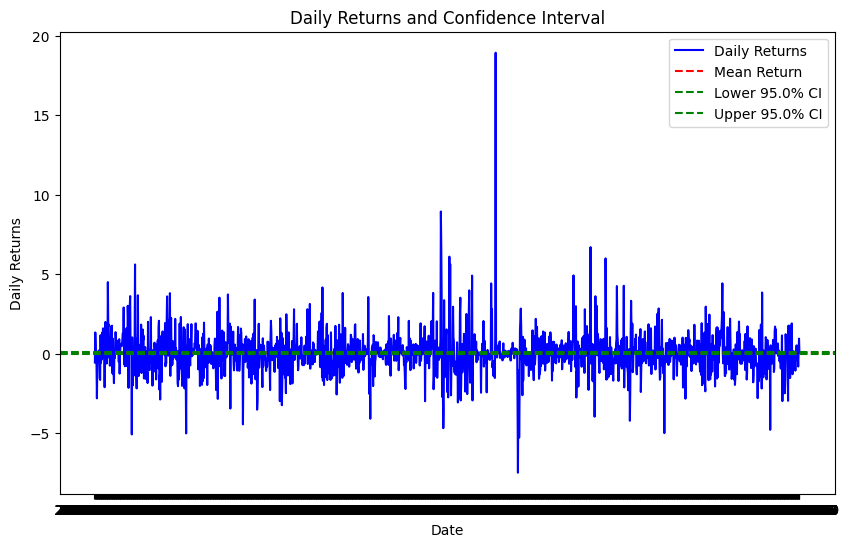

In [13]:
# Plot the daily returns
plt.figure(figsize=(10, 6))
plt.plot(glaxo['Date'], glaxo['Daily_Return'], label='Daily Returns', color='blue')
plt.axhline(y=mean_return_glaxo, color='red', linestyle='--', label='Mean Return')
plt.axhline(y=lower_bound, color='green', linestyle='--', label=f'Lower {confidence_level*100}% CI')
plt.axhline(y=upper_bound, color='green', linestyle='--', label=f'Upper {confidence_level*100}% CI')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Daily Returns')
plt.title('Daily Returns and Confidence Interval')
plt.legend()

# Show the plot
plt.show()

## BEML

In [14]:
confidence_level = 0.95
z_score = norm.ppf((1 + confidence_level) / 2)

lower_bound = mean_return_beml - z_score * (std_dev_return_beml / (len(beml['Daily_Return'])**0.5))
upper_bound = mean_return_beml + z_score * (std_dev_return_beml / (len(beml['Daily_Return'])**0.5))


In [15]:

# Print the results
print(f"Mean Daily Return: {mean_return_beml:.6f}")
print(f"Standard Deviation of Daily Return: {std_dev_return_beml:.6f}")
print(f"Confidence Interval ({confidence_level * 100}%): ({lower_bound:.6f}, {upper_bound:.6f})")

Mean Daily Return: 0.027075
Standard Deviation of Daily Return: 2.643083
Confidence Interval (95.0%): (-0.097150, 0.151300)


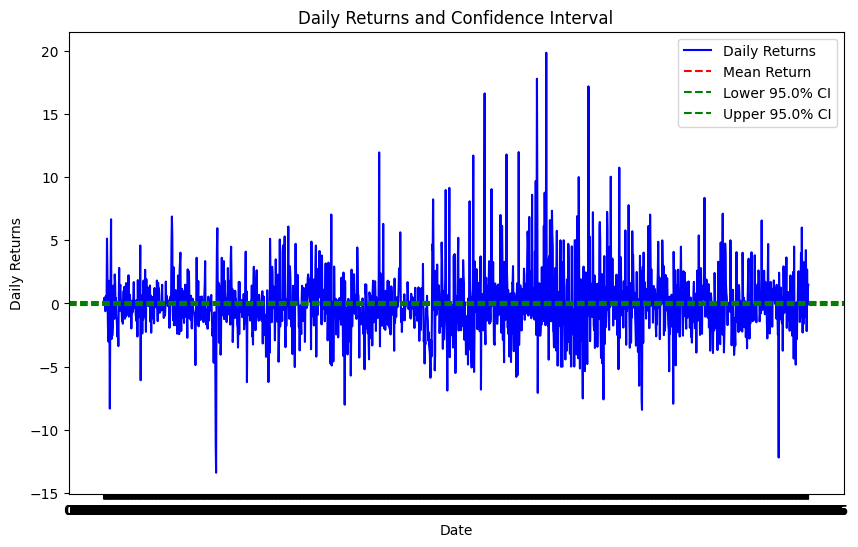

In [16]:
# Plot the daily returns
plt.figure(figsize=(10, 6))
plt.plot(beml['Date'], beml['Daily_Return'], label='Daily Returns', color='blue')
plt.axhline(y=mean_return_beml, color='red', linestyle='--', label='Mean Return')
plt.axhline(y=lower_bound, color='green', linestyle='--', label=f'Lower {confidence_level*100}% CI')
plt.axhline(y=upper_bound, color='green', linestyle='--', label=f'Upper {confidence_level*100}% CI')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Daily Returns')
plt.title('Daily Returns and Confidence Interval')
plt.legend()

# Show the plot
plt.show()